In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import gzip

from training_utils import *

2023-06-20 11:36:08.516370: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
name = "4_45_7710_refined"
data = np.load(f"{name}.npy", allow_pickle=True)[None][0][name]

l10 = [ 0.,0., 0.0001, 0.4462, 0.00147931034482759, 0.403353179334616, 0.00285862068965517, 0.364021421197428,0.00423793103448276, 0.327938361800707, 0.00561724137931035, 0.294856876200396, 0.00699655172413793, 0.264547732713157, 0.00837586206896552, 0.236798339297337,0.0097551724137931, 0.211411575720852, 0.0111344827586207, 0.188204705748233, 0.0125137931034483, 0.167008363961625, 0.0138931034482759, 0.147665612187893,0.0152724137931034, 0.130031060837949, 0.016651724137931, 0.113970050776412, 0.0180310344827586, 0.0993578916312382, 0.0194103448275862, 0.0860791527252794,0.0207896551724138, 0.0740270030661679, 0.0221689655172414, 0.0631025970685725, 0.023548275862069, 0.0532145029048911, 0.0249275862068966, 0.0442781705878096,0.0263068965517241, 0.0362154370818443, 0.0276862068965517, 0.0289540659218805, 0.0290655172413793, 0.0224273189856682, 0.0304448275862069, 0.0165735582250075,0.0318241379310345, 0.0113358753076885, 0.0332034482758621, 0.00666174725982981, 0.0345827586206897, 0.00250271632671636]
l15 = [0.,0.,0.0001,0.6066, 0.000326130653266332, 0.597255606871735, 0.000552261306532663, 0.588039538224459,0.000778391959798995, 0.578950140015279, 0.00100452261306533, 0.569985778680351, 0.00123065326633166, 0.561144840888287, 0.00145678391959799, 0.552425733296464,0.00168291457286432, 0.543826882310219, 0.00190904522613065, 0.535346733844879, 0.00213517587939699, 0.526983753090603, 0.00236130653266332, 0.518736424279999,0.00258743718592965, 0.510603250458486, 0.00281356783919598, 0.502582753257369, 0.00303969849246231, 0.494673472669594, 0.00326582914572864, 0.486873966828152,0.00349195979899498, 0.479182811787102, 0.00371809045226131, 0.471598601305186, 0.00394422110552764, 0.464119946631993, 0.00417035175879397, 0.456745476296665,0.0043964824120603, 0.449473835899089, 0.00462261306532663, 0.442303687903566, 0.00484874371859297, 0.435233711434919, 0.0050748743718593, 0.428262602077018,0.00530100502512563, 0.421389071673683, 0.00552713567839196, 0.414611848131946, 0.00575326633165829, 0.407929675227649, 0.00597939698492462, 0.401341312413332,0.00620552763819096, 0.39484553462841, 0.00643165829145729, 0.388441132111588, 0.00665778894472362, 0.382126910215507, 0.00688391959798995, 0.375901689223581,0.00711005025125628, 0.369764304169008, 0.00733618090452261, 0.363713604655925, 0.00756231155778894, 0.357748454682691, 0.00778844221105528, 0.351867732467255,0.00801457286432161, 0.346070330274603, 0.00824070351758794, 0.340355154246253, 0.00846683417085427, 0.334721124231771, 0.0086929648241206, 0.329167173622288,0.00891909547738693, 0.323692249185992, 0.00914522613065327, 0.318295310905579, 0.0093713567839196, 0.312975331817627, 0.00959748743718593, 0.307731297853887,0.00982361809045226, 0.302562207684454, 0.0100497487437186, 0.2974670725628, 0.0102758793969849, 0.292444916172661, 0.0105020100502513, 0.287494774476728,0.0107281407035176, 0.282615695567152, 0.0109542713567839, 0.277806739517819, 0.0111804020100503, 0.273066978238387, 0.0114065326633166, 0.268395495330055,0.0116326633165829, 0.263791385943056, 0.0118587939698492, 0.259253756635837, 0.0120849246231156, 0.254781725235929, 0.0123110552763819, 0.250374420702459,0.0125371859296482, 0.246030982990315, 0.0127633165829146, 0.241750562915915, 0.0129894472361809, 0.237532322024587, 0.0132155778894472, 0.233375432459526,0.0134417085427136, 0.229279076832312, 0.0136678391959799, 0.225242448094972, 0.0138939698492462, 0.221264749413574, 0.0141201005025126, 0.217345194043321,0.0143462311557789, 0.213483005205142, 0.0145723618090452, 0.209677415963749, 0.0147984924623116, 0.20592766910716, 0.0150246231155779, 0.202233017027652,0.0152507537688442, 0.198592721604139, 0.0154768844221106, 0.195006054085953, 0.0157030150753769, 0.191472294978023, 0.0159291457286432, 0.187990733927409,0.0161552763819096, 0.184560669611211, 0.0163814070351759, 0.181181409625806, 0.0166075376884422, 0.177852270377416, 0.0168336683417085, 0.174572576973979,0.0170597989949749, 0.171341663118321, 0.0172859296482412, 0.168158871002604, 0.0175120603015075, 0.165023551204031, 0.0177381909547739, 0.161935062581814,0.0179643216080402, 0.15889277217536, 0.0181904522613065, 0.155896055103688, 0.0184165829145729, 0.152944294466046, 0.0186427135678392, 0.150036881243721,0.0188688442211055, 0.147173214203024, 0.0190949748743719, 0.144352699799443, 0.0193211055276382, 0.141574752082938, 0.0195472361809045, 0.138838792604378,0.0197733668341709, 0.136144250323099, 0.0199994974874372, 0.133490561515573, 0.0202256281407035, 0.130877169685166, 0.0204517587939699, 0.128303525472992,0.0206778894472362, 0.125769086569826, 0.0209040201005025, 0.123273317629081, 0.0211301507537688, 0.120815690180833, 0.0213562814070352, 0.118395682546868,0.0215824120603015, 0.116012779756769, 0.0218085427135678, 0.11366647346499, 0.0220346733668342, 0.111356261868947, 0.0222608040201005, 0.109081649628081,0.0224869346733668, 0.106842147783902, 0.0227130653266332, 0.104637273680993, 0.0229391959798995, 0.102466550888964, 0.0231653266331658, 0.100329509125348,0.0233914572864322, 0.0982256841794246, 0.0236175879396985, 0.0961546178369601, 0.0238437185929648, 0.0941158578058585, 0.0240698492462312, 0.092108957642704,0.0242959798994975, 0.0901334766801921, 0.0245221105527638, 0.0881889799554347, 0.0247482412060302, 0.0862750381391305, 0.0249743718592965, 0.0843912274655903,0.0252005025125628, 0.0825371296636056, 0.0254266331658292, 0.0807123318881533, 0.0256527638190955, 0.078916426652924, 0.0258788944723618, 0.0771490117636656,0.0261050251256281, 0.0754096902523324, 0.0263311557788945, 0.0736980703120296, 0.0265572864321608, 0.0720137652327443, 0.0267834170854271, 0.0703563933378536,0.0270095477386935, 0.0687255779214004, 0.0272356783919598, 0.0671209471861283, 0.0274618090452261, 0.0655421341822661, 0.0276879396984925, 0.0639887767470529,0.0279140703517588, 0.0624605174449957, 0.0281402010050251, 0.0609570035088507, 0.0283663316582915, 0.0594778867813188, 0.0285924623115578, 0.0580228236574478,0.0288185929648241, 0.0565914750277332, 0.0290447236180905, 0.0551835062219078, 0.0292708542713568, 0.0537985869534137, 0.0294969849246231, 0.0524363912645473,0.0297231155778895, 0.0510965974722701, 0.0299492462311558, 0.0497788881146768, 0.0301753768844221, 0.048482949898114, 0.0304015075376884, 0.0472084736449397,0.0306276381909548, 0.0459551542419185, 0.0308537688442211, 0.0447226905892433, 0.0310798994974874, 0.0435107855501762, 0.0313060301507538, 0.0423191459013017,0.0315321608040201, 0.0411474822833856, 0.0317582914572864, 0.03999550915283, 0.0319844221105528, 0.0388629447337202, 0.0322105527638191, 0.0377495109704547,0.0324366834170854, 0.0366549334809516, 0.0326628140703518, 0.0355789415104251, 0.0328889447236181, 0.0345212678857249, 0.0331150753768844, 0.0334816489702317,0.0333412060301508, 0.0324598246193025, 0.0335673366834171, 0.0314555381362592, 0.0337934673366834, 0.0304685362289133, 0.0340195979899498, 0.0294985689666215,0.0342457286432161, 0.0285453897378651, 0.0344718592964824, 0.0276087552083464, 0.0346979899497487, 0.0266884252795979, 0.0349241206030151, 0.0257841630480957,0.0351502512562814, 0.0248957347648732, 0.0353763819095477, 0.0240229097956276, 0.0356025125628141, 0.0231654605813146, 0.0358286432160804, 0.0223231625992243,0.0360547738693467, 0.0214957943245335, 0.0362809045226131, 0.0206831371923279, 0.0365070351758794, 0.0198849755600897, 0.0367331658291457, 0.0191010966706435,0.0369592964824121, 0.0183312906155567, 0.0371854271356784, 0.0175753502989876, 0.0374115577889447, 0.0168330714019766, 0.0376376884422111, 0.0161042523471749,0.0378638190954774, 0.015388694264006, 0.0380899497487437, 0.0146862009542538, 0.0383160804020101, 0.0139965788580732, 0.0385422110552764, 0.0133196370204177,0.0387683417085427, 0.012655187057879, 0.038994472361809, 0.0120030431259338, 0.0392206030150754, 0.0113630218865928, 0.0394467336683417, 0.0107349424764472,0.039672864321608, 0.0101186264751076, 0.0398989949748744, 0.00951389787403178, 0.0401251256281407, 0.00892058304573438, 0.040351256281407, 0.00833851071337684,0.0405773869346734, 0.00776751192073038, 0.0408035175879397, 0.00720742000250932, 0.041029648241206, 0.00665807055506956, 0.0412557788944724, 0.00611930140746779,0.0414819095477387, 0.00559095259287752, 0.041708040201005, 0.00507286632035721, 0.0419341708542714, 0.00456488694696666, 0.0421603015075377, 0.00406686095022704,0.042386432160804, 0.00357863690092094, 0.0426125628140704, 0.00310006543622792, 0.0428386934673367, 0.00263099923319176, 0.043064824120603, 0.00217129298251542,0.0432909547738693, 0.00172080336267967, 0.0435170854271357, 0.0012793890143815, 0.043743216080402, 0.000846910515288722]

l10 = np.array([l10[::2], l10[1::2]])
l15 = np.array([l15[::2], l15[1::2]])

l10[0] *= 1000
l15[0] *= 1000

In [3]:
arr = np.loadtxt("p77_10.txt")
arr[:,1] -= arr[0,1]
arr[:,0] *= 1000
arr[:,0] -= arr[1,0]

arr2 = np.loadtxt("p77_15.txt")
arr2[:,1] -= arr2[0,1]
arr2[:,0] *= 1000
arr2[:,0] -= arr2[1,0]

PLAG10 = np.array([arr[1:-1,0], arr[1:-1,1]*1E-6])
PLAG15 = np.array([arr2[1:-1,0], arr2[1:-1,1]*1E-6])

1.490000000000005


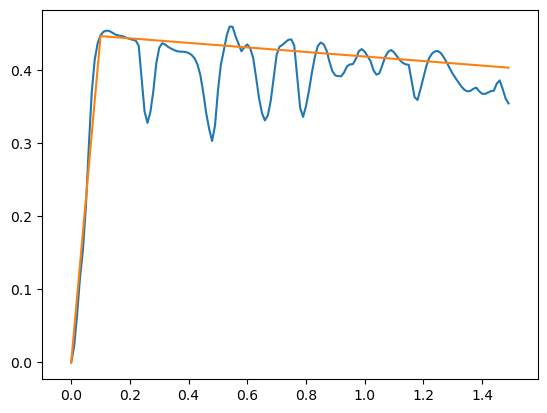

In [4]:
tmp = (data["p"]-data["p"][0,0])*1E-6
amp = l10
i = (tmp[1:,0] - tmp[:-1,0]).argmax()-76
eid = 1500
t = (data["t"][i:] - data["t"][i])*1000
tmp[i,:] = 0
print(t.max())
plt.plot(t,tmp[i:,eid])
plt.plot(t,np.interp(t,amp[0], amp[1]))
plt.xlim(-0.1,t[-1]+0.1)
plt.show()

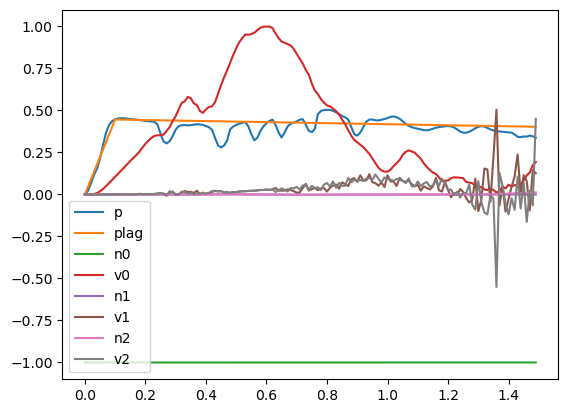

In [5]:
p = np.array(tmp[i:,:])
plag = np.zeros_like(p)
plag.T[:] = np.interp(t,amp[0], amp[1])
v0 = data["v0"][i:]
n0 = data["n0"][i:]
v1 = data["v1"][i:]
n1 = data["n1"][i:]
v2 = data["v2"][i:]
n2 = data["n2"][i:]

plt.plot(t,p[:,0], label="p")
plt.plot(t,plag[:,0], label="plag")
plt.plot(t,n0[:,0], label="n0")
plt.plot(t,v0[:,0]/v0[:,0].max(), label="v0")
plt.plot(t,n1[:,0], label="n1")
plt.plot(t,v1[:,0], label="v1")
plt.plot(t,n2[:,0], label="n2")
plt.plot(t,v2[:,0], label="v2")
plt.legend()
plt.show()

In [21]:
train_data = np.concatenate([
    np.transpose([plag.flatten(), n0.flatten(), v0.flatten(), n1.flatten(), v1.flatten(),n2.flatten(), v2.flatten(), p.flatten()]),
    np.transpose([plag.flatten(), n0.flatten(), v0.flatten(), -n1.flatten(), -v1.flatten(),n2.flatten(), v2.flatten(), p.flatten()]),
    np.transpose([plag.flatten(), n0.flatten(), v0.flatten(), n1.flatten(), v1.flatten(),-n2.flatten(), -v2.flatten(), p.flatten()]),
    np.transpose([plag.flatten(), n0.flatten(), v0.flatten(), -n1.flatten(), -v1.flatten(),-n2.flatten(), -v2.flatten(), p.flatten()])
])

lis = list()
for i in range(len(train_data)):
    if np.isfinite(train_data[i,-1]):
        lis.append(i)

print(np.all(np.isfinite(train_data)))
train_data = np.array(train_data[lis])
norms = np.linalg.norm(train_data, np.inf, axis=0)
np.random.shuffle(train_data)
print(np.all(np.isfinite(train_data)))

False
True


In [22]:
np.savez_compressed(name,t=t, v0=v0, n0=n0,v1=v1, n1=n1,v2=v2, n2=n2, p=p, plag=plag, norms=norms, train=train_data)

In [23]:
dic = dict()
for n in ["4_45_7710_refined","4_45_7715_refined", "4_HV_7710_refined", "4_HV_7715_refined"]:
    dic[n] = np.load(f"{n}.npz")

In [24]:
tr = np.concatenate([v["train"] for v in dic.values()])
max_norms = np.linalg.norm(tr, np.inf, axis=0)
norm_cpy = np.array(max_norms)
print(norm_cpy)
norm_cpy[2:7:2] *= 1000
for b in 1/norm_cpy:
    print(b)

for _ in range(8):
    tr[:,_] /= max_norms[_]
np.random.shuffle(tr)


[  0.6066     1.       138.554      0.998869 133.665      0.997143
 118.13       0.619785]
1.6485328058029027
1.0
7.217402601151898e-06
1.0011322806093692
7.481390042269854e-06
1.0028651858359332
8.465250148141878e-06
1.6134627330445237


In [25]:
with gzip.open("train.pkl.gz","wb") as fp:
    pickle.dump({"data":tr, "norms":max_norms}, fp)

In [6]:
with gzip.open("all_4_64.pkl.gz","rb") as fp:
    dic = pickle.load(fp)
with gzip.open("train.pkl.gz", "rb") as fp:
    dic2 = pickle.load(fp)
with gzip.open("all_4_64_2.pkl.gz","rb") as fp:
    dic3 = pickle.load(fp)

2023-06-20 11:36:26.719674: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-20 11:36:26.965009: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-20 11:36:26.965053: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-20 11:36:26.965939: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-20 11:36:26.965976: I tensorflow/compile

In [7]:
model = dic["model"]
norms = dic2["norms"]
data = dic2["data"]
hist = dic["history"]
datas = dict()
for n in ["4_45_7710_refined","4_45_7715_refined", "4_HV_7710_refined", "4_HV_7715_refined"]:
    datas[n] = np.load(f"{n}.npz")

norm_cpy = np.array(norms)
print(norm_cpy)
norm_cpy[2:7:2] *= 1000
for b in 1/norm_cpy:
    print(f"{b:.8}")


[  0.6066     1.       138.554      0.998869 133.665      0.997143
 118.13       0.619785]
1.6485328
1.0
7.2174026e-06
1.0011323
7.48139e-06
1.0028652
8.4652501e-06
1.6134627


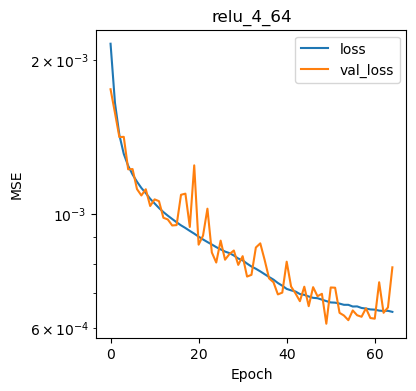

In [8]:
fig = plt.figure(figsize=(4,4))

for k,v in hist.items():
    plt.plot(np.concatenate([v,dic3["history"][k]]),label=k)
plt.legend()
plt.yscale("log")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.title("relu_4_64")
plt.savefig("relu_4_64.pdf",bbox_inches="tight")
plt.show()

1/1 [==============================] - 2s 2s/step


2023-06-20 11:36:56.297142: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1/1 [==============================] - 0s 17ms/step


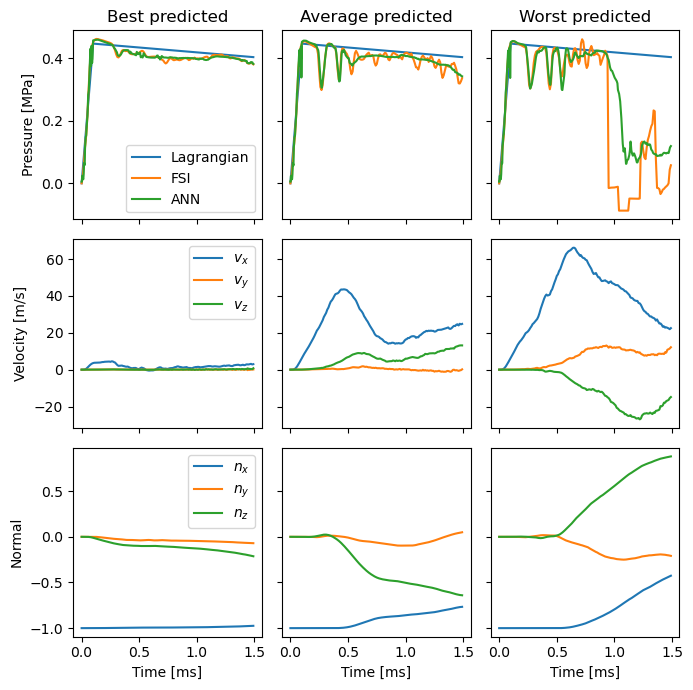

In [9]:
data = datas["4_45_7710_refined"]
plag = data["plag"]
n0 = data["n0"]
v0 = data["v0"]
n1 = data["n1"]
v1 = data["v1"]
n2 = data["n2"]
v2 = data["v2"]
p = data["p"]
t = data["t"]

in_data = np.transpose([plag.flatten(), n0.flatten(), v0.flatten(), n1.flatten(), v1.flatten(),n2.flatten(), v2.flatten(), p.flatten()])

for i in range(len(norms)):
    in_data[:,i] /= norms[i]

out = model.predict(in_data[:,:-1], batch_size=len(in_data))

out = out.reshape(plag.shape)*norms[-1]
e = p - out
ee = np.array([(np.abs(e[:,i])).mean() for i in range(len(e[0]))])

lis = list()
for i in range(len(ee)):
    if np.isfinite(ee[i]):
        lis.append(i)
ee = np.array(ee[lis])

t_int = np.linspace(t[0], t[-1], 1000)
eid = ee.argmin()
plag_int = np.interp(t_int, t, plag[:,lis][:,eid])
n0_int = np.interp(t_int, t, n0[:,lis][:,eid])
v0_int = np.interp(t_int, t, v0[:,lis][:,eid])
n1_int = np.interp(t_int, t, n1[:,lis][:,eid])
v1_int = np.interp(t_int, t, v1[:,lis][:,eid])
n2_int = np.interp(t_int, t, n2[:,lis][:,eid])
v2_int = np.interp(t_int, t, v2[:,lis][:,eid])
p_int = np.interp(t_int, t, p[:,lis][:,eid])

in_data_int = np.transpose([plag_int, n0_int, v0_int, n1_int, v1_int,n2_int, v2_int, p_int])

for i in range(len(norms)):
    in_data_int[:,i] /= norms[i]

out = model.predict(in_data_int[:,:-1], batch_size=len(in_data_int))*norms[-1]

fig, ((ax1,axa, ax2),(ax3,axb,ax4),(ax5,axc,ax6)) = plt.subplots(3,3,figsize=(7,7), sharex=True, sharey="row", subplot_kw=dict(box_aspect=1, xlabel="Time [ms]"))
ax1.set_title(f"Best predicted")
ax1.plot(t,plag[:,lis][:,eid], label="Lagrangian")
ax1.plot(t,p[:,lis][:,eid], label="FSI")
ax1.plot(t_int,out.flatten(), label="ANN")
ax1.legend()
ax1.set_ylabel("Pressure [MPa]")

ax3.set_ylabel("Velocity [m/s]")
ax3.plot(t,v0[:,lis][:,eid], label="$v_x$")
ax3.plot(t,v1[:,lis][:,eid], label="$v_y$")
ax3.plot(t,v2[:,lis][:,eid], label="$v_z$")
ax3.legend()

ax5.set_ylabel("Normal")
ax5.plot(t,n0[:,lis][:,eid], label="$n_x$")
ax5.plot(t,n1[:,lis][:,eid], label="$n_y$")
ax5.plot(t,n2[:,lis][:,eid], label="$n_z$")
ax5.legend()

eid = ee.argmax()
plag_int = np.interp(t_int, t, plag[:,lis][:,eid])
n0_int = np.interp(t_int, t, n0[:,lis][:,eid])
v0_int = np.interp(t_int, t, v0[:,lis][:,eid])
n1_int = np.interp(t_int, t, n1[:,lis][:,eid])
v1_int = np.interp(t_int, t, v1[:,lis][:,eid])
n2_int = np.interp(t_int, t, n2[:,lis][:,eid])
v2_int = np.interp(t_int, t, v2[:,lis][:,eid])
p_int = np.interp(t_int, t, p[:,lis][:,eid])

in_data_int = np.transpose([plag_int, n0_int, v0_int, n1_int, v1_int,n2_int, v2_int, p_int])

for i in range(len(norms)):
    in_data_int[:,i] /= norms[i]

out = model.predict(in_data_int[:,:-1], batch_size=len(in_data_int))*norms[-1]

ax2.set_title(f"Worst predicted")
ax2.plot(t,plag[:,lis][:,eid], label="Lagrangian")
ax2.plot(t,p[:,lis][:,eid], label="FSI")
ax2.plot(t_int,out.flatten(), label="ANN")

ax4.plot(t,v0[:,lis][:,eid])
ax4.plot(t,v1[:,lis][:,eid])
ax4.plot(t,v2[:,lis][:,eid])

ax6.plot(t,n0[:,lis][:,eid])
ax6.plot(t,n1[:,lis][:,eid])
ax6.plot(t,n2[:,lis][:,eid])


eid = np.argmin(np.abs(ee-ee.mean()))
plag_int = np.interp(t_int, t, plag[:,lis][:,eid])
n0_int = np.interp(t_int, t, n0[:,lis][:,eid])
v0_int = np.interp(t_int, t, v0[:,lis][:,eid])
n1_int = np.interp(t_int, t, n1[:,lis][:,eid])
v1_int = np.interp(t_int, t, v1[:,lis][:,eid])
n2_int = np.interp(t_int, t, n2[:,lis][:,eid])
v2_int = np.interp(t_int, t, v2[:,lis][:,eid])
p_int = np.interp(t_int, t, p[:,lis][:,eid])

in_data_int = np.transpose([plag_int, n0_int, v0_int, n1_int, v1_int,n2_int, v2_int, p_int])

for i in range(len(norms)):
    in_data_int[:,i] /= norms[i]

out = model.predict(in_data_int[:,:-1], batch_size=len(in_data_int))*norms[-1]

axa.set_title(f"Average predicted")
axa.plot(t,plag[:,lis][:,eid], label="Lagrangian")
axa.plot(t,p[:,lis][:,eid], label="FSI")
axa.plot(t_int,out.flatten(), label="ANN")

axb.plot(t,v0[:,lis][:,eid])
axb.plot(t,v1[:,lis][:,eid])
axb.plot(t,v2[:,lis][:,eid])

axc.plot(t,n0[:,lis][:,eid])
axc.plot(t,n1[:,lis][:,eid])
axc.plot(t,n2[:,lis][:,eid])

fig.tight_layout()
fig.savefig(f"best_worst_4-45_10.pdf", bbox_inches="tight")
plt.show()

1/1 [==============================] - 0s 18ms/step


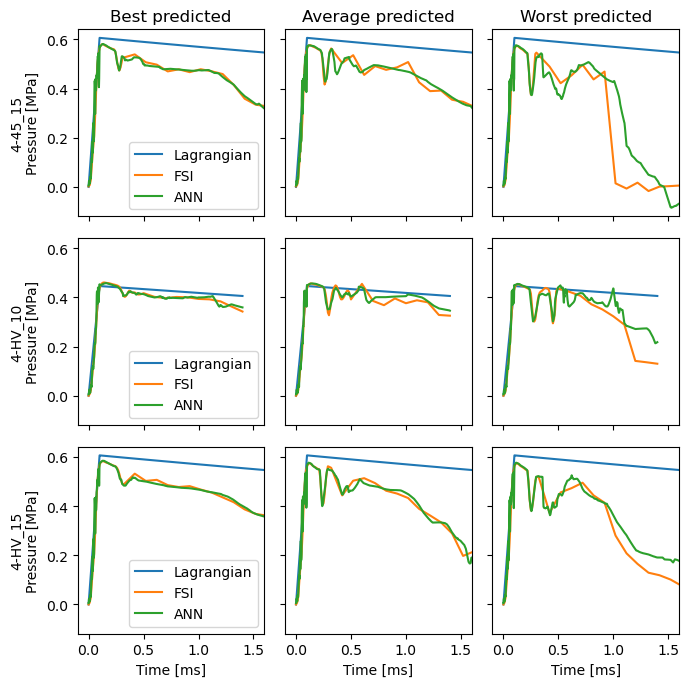

In [15]:
data = datas["4_45_7715_refined"]
plag = data["plag"]
n0 = data["n0"]
v0 = data["v0"]
n1 = data["n1"]
v1 = data["v1"]
n2 = data["n2"]
v2 = data["v2"]
p = data["p"]
t = data["t"]

in_data = np.transpose([plag.flatten(), n0.flatten(), v0.flatten(), n1.flatten(), v1.flatten(),n2.flatten(), v2.flatten(), p.flatten()])

for i in range(len(norms)):
    in_data[:,i] /= norms[i]

out = model.predict(in_data[:,:-1], batch_size=len(in_data))

out = out.reshape(plag.shape)*norms[-1]
e = p - out
ee = np.array([(np.abs(e[:,i])).mean() for i in range(len(e[0]))])

lis = list()
for i in range(len(ee)):
    if np.isfinite(ee[i]):
        lis.append(i)
ee = np.array(ee[lis])

t_int = np.linspace(t[0], t[-1], 1000)
eid = ee.argmin()
plag_int = np.interp(t_int, t, plag[:,lis][:,eid])
n0_int = np.interp(t_int, t, n0[:,lis][:,eid])
v0_int = np.interp(t_int, t, v0[:,lis][:,eid])
n1_int = np.interp(t_int, t, n1[:,lis][:,eid])
v1_int = np.interp(t_int, t, v1[:,lis][:,eid])
n2_int = np.interp(t_int, t, n2[:,lis][:,eid])
v2_int = np.interp(t_int, t, v2[:,lis][:,eid])
p_int = np.interp(t_int, t, p[:,lis][:,eid])

in_data_int = np.transpose([plag_int, n0_int, v0_int, n1_int, v1_int,n2_int, v2_int, p_int])

for i in range(len(norms)):
    in_data_int[:,i] /= norms[i]

out = model.predict(in_data_int[:,:-1], batch_size=len(in_data_int))*norms[-1]

fig, ((ax1,axa, ax2),(ax3,axb,ax4),(ax5,axc,ax6)) = plt.subplots(3,3,figsize=(7,7), sharex=True, sharey=True, subplot_kw=dict(box_aspect=1, xlabel="Time [ms]", xlim=(-0.1,1.6), xticks=[0,0.5,1,1.5]))
ax1.set_title(f"Best predicted")
ax1.plot(t,plag[:,lis][:,eid], label="Lagrangian")
ax1.plot(t,p[:,lis][:,eid], label="FSI")
ax1.plot(t_int,out.flatten(), label="ANN")
ax1.legend()
ax1.set_ylabel("4-45_15\nPressure [MPa]")

eid = ee.argmax()
plag_int = np.interp(t_int, t, plag[:,lis][:,eid])
n0_int = np.interp(t_int, t, n0[:,lis][:,eid])
v0_int = np.interp(t_int, t, v0[:,lis][:,eid])
n1_int = np.interp(t_int, t, n1[:,lis][:,eid])
v1_int = np.interp(t_int, t, v1[:,lis][:,eid])
n2_int = np.interp(t_int, t, n2[:,lis][:,eid])
v2_int = np.interp(t_int, t, v2[:,lis][:,eid])
p_int = np.interp(t_int, t, p[:,lis][:,eid])

in_data_int = np.transpose([plag_int, n0_int, v0_int, n1_int, v1_int,n2_int, v2_int, p_int])

for i in range(len(norms)):
    in_data_int[:,i] /= norms[i]

out = model.predict(in_data_int[:,:-1], batch_size=len(in_data_int))*norms[-1]

ax2.set_title(f"Worst predicted")
ax2.plot(t,plag[:,lis][:,eid], label="Lagrangian")
ax2.plot(t,p[:,lis][:,eid], label="FSI")
ax2.plot(t_int,out.flatten(), label="ANN")


eid = np.argmin(np.abs(ee-ee.mean()))
plag_int = np.interp(t_int, t, plag[:,lis][:,eid])
n0_int = np.interp(t_int, t, n0[:,lis][:,eid])
v0_int = np.interp(t_int, t, v0[:,lis][:,eid])
n1_int = np.interp(t_int, t, n1[:,lis][:,eid])
v1_int = np.interp(t_int, t, v1[:,lis][:,eid])
n2_int = np.interp(t_int, t, n2[:,lis][:,eid])
v2_int = np.interp(t_int, t, v2[:,lis][:,eid])
p_int = np.interp(t_int, t, p[:,lis][:,eid])

in_data_int = np.transpose([plag_int, n0_int, v0_int, n1_int, v1_int,n2_int, v2_int, p_int])

for i in range(len(norms)):
    in_data_int[:,i] /= norms[i]

out = model.predict(in_data_int[:,:-1], batch_size=len(in_data_int))*norms[-1]

axa.set_title(f"Average predicted")
axa.plot(t,plag[:,lis][:,eid], label="Lagrangian")
axa.plot(t,p[:,lis][:,eid], label="FSI")
axa.plot(t_int,out.flatten(), label="ANN")


##################

data = datas["4_HV_7710_refined"]
plag = data["plag"]
n0 = data["n0"]
v0 = data["v0"]
n1 = data["n1"]
v1 = data["v1"]
n2 = data["n2"]
v2 = data["v2"]
p = data["p"]
t = data["t"]

in_data = np.transpose([plag.flatten(), n0.flatten(), v0.flatten(), n1.flatten(), v1.flatten(),n2.flatten(), v2.flatten(), p.flatten()])

for i in range(len(norms)):
    in_data[:,i] /= norms[i]

out = model.predict(in_data[:,:-1], batch_size=len(in_data))

out = out.reshape(plag.shape)*norms[-1]
e = p - out
ee = np.array([(np.abs(e[:,i])).mean() for i in range(len(e[0]))])

lis = list()
for i in range(len(ee)):
    if np.isfinite(ee[i]):
        lis.append(i)
ee = np.array(ee[lis])

t_int = np.linspace(t[0], t[-1], 1000)
eid = ee.argmin()
plag_int = np.interp(t_int, t, plag[:,lis][:,eid])
n0_int = np.interp(t_int, t, n0[:,lis][:,eid])
v0_int = np.interp(t_int, t, v0[:,lis][:,eid])
n1_int = np.interp(t_int, t, n1[:,lis][:,eid])
v1_int = np.interp(t_int, t, v1[:,lis][:,eid])
n2_int = np.interp(t_int, t, n2[:,lis][:,eid])
v2_int = np.interp(t_int, t, v2[:,lis][:,eid])
p_int = np.interp(t_int, t, p[:,lis][:,eid])

in_data_int = np.transpose([plag_int, n0_int, v0_int, n1_int, v1_int,n2_int, v2_int, p_int])

for i in range(len(norms)):
    in_data_int[:,i] /= norms[i]

out = model.predict(in_data_int[:,:-1], batch_size=len(in_data_int))*norms[-1]


ax3.plot(t,plag[:,lis][:,eid], label="Lagrangian")
ax3.plot(t,p[:,lis][:,eid], label="FSI")
ax3.plot(t_int,out.flatten(), label="ANN")
ax3.legend()
ax3.set_ylabel("4-HV_10\nPressure [MPa]")

eid = ee.argmax()
plag_int = np.interp(t_int, t, plag[:,lis][:,eid])
n0_int = np.interp(t_int, t, n0[:,lis][:,eid])
v0_int = np.interp(t_int, t, v0[:,lis][:,eid])
n1_int = np.interp(t_int, t, n1[:,lis][:,eid])
v1_int = np.interp(t_int, t, v1[:,lis][:,eid])
n2_int = np.interp(t_int, t, n2[:,lis][:,eid])
v2_int = np.interp(t_int, t, v2[:,lis][:,eid])
p_int = np.interp(t_int, t, p[:,lis][:,eid])

in_data_int = np.transpose([plag_int, n0_int, v0_int, n1_int, v1_int,n2_int, v2_int, p_int])

for i in range(len(norms)):
    in_data_int[:,i] /= norms[i]

out = model.predict(in_data_int[:,:-1], batch_size=len(in_data_int))*norms[-1]


ax4.plot(t,plag[:,lis][:,eid], label="Lagrangian")
ax4.plot(t,p[:,lis][:,eid], label="FSI")
ax4.plot(t_int,out.flatten(), label="ANN")


eid = np.argmin(np.abs(ee-ee.mean()))
plag_int = np.interp(t_int, t, plag[:,lis][:,eid])
n0_int = np.interp(t_int, t, n0[:,lis][:,eid])
v0_int = np.interp(t_int, t, v0[:,lis][:,eid])
n1_int = np.interp(t_int, t, n1[:,lis][:,eid])
v1_int = np.interp(t_int, t, v1[:,lis][:,eid])
n2_int = np.interp(t_int, t, n2[:,lis][:,eid])
v2_int = np.interp(t_int, t, v2[:,lis][:,eid])
p_int = np.interp(t_int, t, p[:,lis][:,eid])

in_data_int = np.transpose([plag_int, n0_int, v0_int, n1_int, v1_int,n2_int, v2_int, p_int])

for i in range(len(norms)):
    in_data_int[:,i] /= norms[i]

out = model.predict(in_data_int[:,:-1], batch_size=len(in_data_int))*norms[-1]


axb.plot(t,plag[:,lis][:,eid], label="Lagrangian")
axb.plot(t,p[:,lis][:,eid], label="FSI")
axb.plot(t_int,out.flatten(), label="ANN")

##################

data = datas["4_HV_7715_refined"]
plag = data["plag"]
n0 = data["n0"]
v0 = data["v0"]
n1 = data["n1"]
v1 = data["v1"]
n2 = data["n2"]
v2 = data["v2"]
p = data["p"]
t = data["t"]

in_data = np.transpose([plag.flatten(), n0.flatten(), v0.flatten(), n1.flatten(), v1.flatten(),n2.flatten(), v2.flatten(), p.flatten()])

for i in range(len(norms)):
    in_data[:,i] /= norms[i]

out = model.predict(in_data[:,:-1], batch_size=len(in_data))

out = out.reshape(plag.shape)*norms[-1]
e = p - out
ee = np.array([(np.abs(e[:,i])).mean() for i in range(len(e[0]))])

lis = list()
for i in range(len(ee)):
    if np.isfinite(ee[i]):
        lis.append(i)
ee = np.array(ee[lis])

t_int = np.linspace(t[0], t[-1], 1000)
eid = ee.argmin()
plag_int = np.interp(t_int, t, plag[:,lis][:,eid])
n0_int = np.interp(t_int, t, n0[:,lis][:,eid])
v0_int = np.interp(t_int, t, v0[:,lis][:,eid])
n1_int = np.interp(t_int, t, n1[:,lis][:,eid])
v1_int = np.interp(t_int, t, v1[:,lis][:,eid])
n2_int = np.interp(t_int, t, n2[:,lis][:,eid])
v2_int = np.interp(t_int, t, v2[:,lis][:,eid])
p_int = np.interp(t_int, t, p[:,lis][:,eid])

in_data_int = np.transpose([plag_int, n0_int, v0_int, n1_int, v1_int,n2_int, v2_int, p_int])

for i in range(len(norms)):
    in_data_int[:,i] /= norms[i]

out = model.predict(in_data_int[:,:-1], batch_size=len(in_data_int))*norms[-1]


ax5.plot(t,plag[:,lis][:,eid], label="Lagrangian")
ax5.plot(t,p[:,lis][:,eid], label="FSI")
ax5.plot(t_int,out.flatten(), label="ANN")
ax5.legend()
ax5.set_ylabel("4-HV_15\nPressure [MPa]")

eid = ee.argmax()
plag_int = np.interp(t_int, t, plag[:,lis][:,eid])
n0_int = np.interp(t_int, t, n0[:,lis][:,eid])
v0_int = np.interp(t_int, t, v0[:,lis][:,eid])
n1_int = np.interp(t_int, t, n1[:,lis][:,eid])
v1_int = np.interp(t_int, t, v1[:,lis][:,eid])
n2_int = np.interp(t_int, t, n2[:,lis][:,eid])
v2_int = np.interp(t_int, t, v2[:,lis][:,eid])
p_int = np.interp(t_int, t, p[:,lis][:,eid])

in_data_int = np.transpose([plag_int, n0_int, v0_int, n1_int, v1_int,n2_int, v2_int, p_int])

for i in range(len(norms)):
    in_data_int[:,i] /= norms[i]

out = model.predict(in_data_int[:,:-1], batch_size=len(in_data_int))*norms[-1]


ax6.plot(t,plag[:,lis][:,eid], label="Lagrangian")
ax6.plot(t,p[:,lis][:,eid], label="FSI")
ax6.plot(t_int,out.flatten(), label="ANN")


eid = np.argmin(np.abs(ee-ee.mean()))
plag_int = np.interp(t_int, t, plag[:,lis][:,eid])
n0_int = np.interp(t_int, t, n0[:,lis][:,eid])
v0_int = np.interp(t_int, t, v0[:,lis][:,eid])
n1_int = np.interp(t_int, t, n1[:,lis][:,eid])
v1_int = np.interp(t_int, t, v1[:,lis][:,eid])
n2_int = np.interp(t_int, t, n2[:,lis][:,eid])
v2_int = np.interp(t_int, t, v2[:,lis][:,eid])
p_int = np.interp(t_int, t, p[:,lis][:,eid])

in_data_int = np.transpose([plag_int, n0_int, v0_int, n1_int, v1_int,n2_int, v2_int, p_int])

for i in range(len(norms)):
    in_data_int[:,i] /= norms[i]

out = model.predict(in_data_int[:,:-1], batch_size=len(in_data_int))*norms[-1]


axc.plot(t,plag[:,lis][:,eid], label="Lagrangian")
axc.plot(t,p[:,lis][:,eid], label="FSI")
axc.plot(t_int,out.flatten(), label="ANN")

fig.tight_layout()
fig.savefig(f"best_worst.pdf", bbox_inches="tight")
plt.show()

1/1 [==============================] - 0s 18ms/step


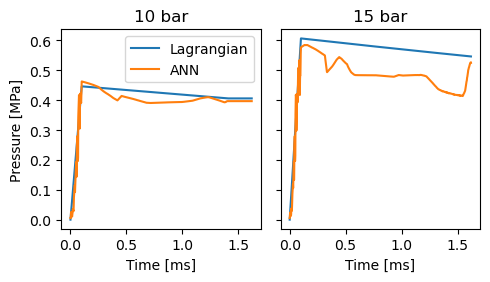

In [14]:
data = datas["4_HV_7710_refined"]
plag = data["plag"]
n0 = data["n0"]
v0 = data["v0"]
n1 = data["n1"]
v1 = data["v1"]
n2 = data["n2"]
v2 = data["v2"]
p = data["p"]
t = data["t"]
plag_int = np.interp(t_int, t, plag[:,0])
n0_int = np.ones_like(plag_int)*-1
v0_int = np.zeros_like(plag_int)
n1_int = np.zeros_like(plag_int)
v1_int = np.zeros_like(plag_int)
n2_int = np.zeros_like(plag_int)
v2_int = np.zeros_like(plag_int)
p_int = np.zeros_like(plag_int)

in_data_int = np.transpose([plag_int, n0_int, v0_int, n1_int, v1_int,n2_int, v2_int, p_int])

for i in range(len(norms)):
    in_data_int[:,i] /= norms[i]

out = model.predict(in_data_int[:,:-1], batch_size=len(in_data_int))*norms[-1]


fig, (ax1,ax2) = plt.subplots(1,2, figsize=(5,5), sharex=True, sharey=True, subplot_kw=dict(box_aspect=1, xlabel="Time [ms]"))
ax1.plot(t_int,plag_int, label="Lagrangian")
ax1.plot(t_int,out.flatten(), label="ANN")
ax1.set_title("10 bar")
ax1.set_ylabel("Pressure [MPa]")
ax1.legend()
ax1.set_xlabel("Time [ms]")

data = datas["4_HV_7715_refined"]
plag = data["plag"]
n0 = data["n0"]
v0 = data["v0"]
n1 = data["n1"]
v1 = data["v1"]
n2 = data["n2"]
v2 = data["v2"]
p = data["p"]
t = data["t"]
plag_int = np.interp(t_int, t, plag[:,lis][:,0])
n0_int = np.ones_like(plag_int)*-1
v0_int = np.zeros_like(plag_int)
n1_int = np.zeros_like(plag_int)
v1_int = np.zeros_like(plag_int)
n2_int = np.zeros_like(plag_int)
v2_int = np.zeros_like(plag_int)
p_int = np.zeros_like(plag_int)

in_data_int = np.transpose([plag_int, n0_int, v0_int, n1_int, v1_int,n2_int, v2_int, p_int])

for i in range(len(norms)):
    in_data_int[:,i] /= norms[i]

out = model.predict(in_data_int[:,:-1], batch_size=len(in_data_int))*norms[-1]

ax2.plot(t_int,plag_int, label="Lagrangian")
ax2.plot(t_int,out.flatten(), label="ANN")
ax2.set_title("15 bar")
ax2.set_xlabel("Time [ms]")

fig.tight_layout()
fig.savefig(f"rigid.pdf", bbox_inches="tight")
plt.show()